In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Upload data

In [2]:
final_data = pd.read_csv('FinalSprint1v3.csv')
final_data.head()

,Unnamed: 0,rooms_ratio,mooe_per_student,student_ratio
0,100001,45.000000,933.333333,45.000000
1,100002,38.000000,587.719298,26.823529
2,100003,27.833333,808.383234,23.857143
3,100004,20.333333,950.819672,17.428571
4,100006,18.714286,961.832061,18.714286


In [4]:
final_data = final_data.rename(columns={'Unnamed: 0': 'School ID'})

In [6]:
final_data = pd.read_csv('FinalSprint1v3.csv').set_index('Unnamed: 0')
final_data.head()

,rooms_ratio,mooe_per_student,student_ratio
Unnamed: 0,,,
100001,45.000000,933.333333,45.000000
100002,38.000000,587.719298,26.823529
100003,27.833333,808.383234,23.857143
100004,20.333333,950.819672,17.428571
100006,18.714286,961.832061,18.714286


In [7]:
final_data.isnull().sum()

rooms_ratio         0
mooe_per_student    0
student_ratio       0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='variable', ylabel='value'>

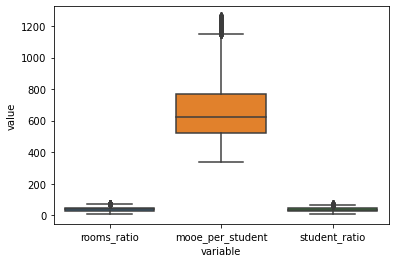

In [8]:
melted = final_data.melt() 
sns.boxplot(melted.variable, melted.value)

# Standard Scaler (includes outliers)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_scaled = scaler.fit_transform(final_data)

# K-Means Clustering

[91311.00000000016, 47870.14410063497, 34881.287804304215, 29583.975083558173, 24870.193681874676, 22261.96905683299, 20215.303069883208, 18691.759270757397, 17247.12105015852, 16081.37290872303, 15160.038436955616, 14322.839871287282, 13540.52004426854, 12849.511625382069, 12276.77181440405]


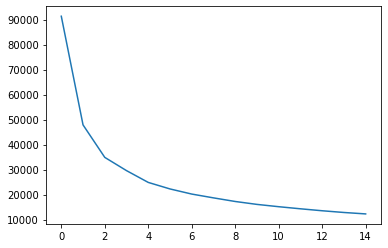

In [10]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(final_scaled)   
    ssd.append(kmeans.inertia_)
    
print(ssd)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [11]:
from sklearn.metrics import silhouette_score
#from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(final_scaled)
    
    cluster_labels = kmeans.predict(final_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(final_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4019756933943368
For n_clusters=3, the silhouette score is 0.34068152323542905
For n_clusters=4, the silhouette score is 0.2904892642225741
For n_clusters=5, the silhouette score is 0.31144358572184594
For n_clusters=6, the silhouette score is 0.27642209269047213
For n_clusters=7, the silhouette score is 0.28240447784140177
For n_clusters=8, the silhouette score is 0.28800707711695794


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(final_scaled)
cluster_labels = kmeans.predict(final_scaled)   


final_data['Cluster_Labels'] = cluster_labels
final_data['Cluster_Labels'].value_counts()

1    13735
2     8812
0     7890
Name: Cluster_Labels, dtype: int64

In [13]:
final_data[final_data['Cluster_Labels']==0]

,rooms_ratio,mooe_per_student,student_ratio,Cluster_Labels
Unnamed: 0,,,,
100003,27.833333,808.383234,23.857143,0
100004,20.333333,950.819672,17.428571,0
100006,18.714286,961.832061,18.714286,0
100007,23.571429,824.242424,23.571429,0
100008,19.083333,851.528384,16.357143,0
...,...,...,...,...
234006,30.666667,923.913043,30.666667,0
234008,70.000000,1085.714286,23.333333,0
237501,20.833333,872.000000,25.000000,0


In [14]:
final_data[final_data['Cluster_Labels']==1]

,rooms_ratio,mooe_per_student,student_ratio,Cluster_Labels
Unnamed: 0,,,,
100001,45.000000,933.333333,45.000000,1
100002,38.000000,587.719298,26.823529,1
100015,30.083333,634.349030,25.785714,1
100020,32.571429,657.894737,28.500000,1
100024,40.285714,563.829787,40.285714,1
...,...,...,...,...
236501,39.333333,618.644068,33.714286,1
237502,35.400000,632.768362,44.250000,1
238003,39.545455,616.091954,21.750000,1


In [15]:
final_data[final_data['Cluster_Labels']==2]

,rooms_ratio,mooe_per_student,student_ratio,Cluster_Labels
Unnamed: 0,,,,
100009,46.666667,792.857143,46.666667,2
100039,57.500000,747.826087,57.500000,2
100103,51.000000,1117.647059,51.000000,2
100168,45.000000,522.222222,45.000000,2
100172,45.100000,481.152993,45.100000,2
...,...,...,...,...
233504,40.250000,652.173913,53.666667,2
234005,55.666667,676.646707,55.666667,2
236001,44.666667,761.194030,67.000000,2


AttributeError: This method only works with the ScalarFormatter

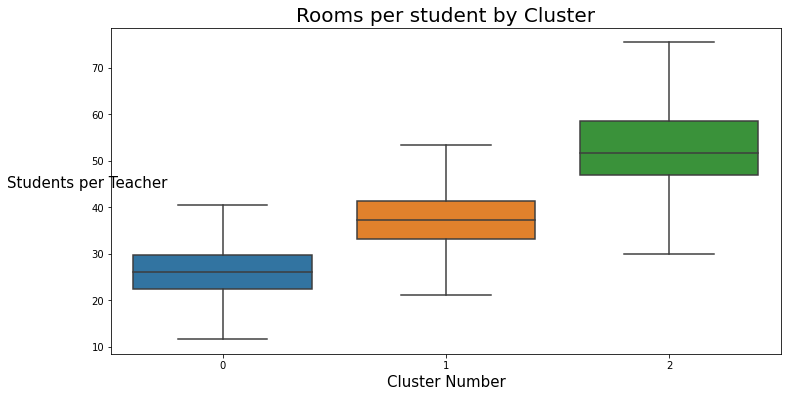

In [16]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Cluster_Labels', y='rooms_ratio', data=final_data, showfliers=False)
plt.title("Rooms per student by Cluster", fontsize=20)
plt.xlabel("Cluster Number", fontsize=15)
plt.ylabel("Students per Teacher", fontsize=15, rotation=0)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ylabel('Cluster No.')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Cluster_Labels', y='student_ratio', data=final_data, showfliers=False)
plt.title("Student per Teacher by Cluster", fontsize=20)
plt.xlabel("Cluster Number", fontsize=15)
plt.ylabel("Students per Teacher", fontsize=15, rotation=0)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ylabel('Cluster No.')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(final_data)

df_minmax = pd.DataFrame(df_minmax, index=final_data.index, columns=final_data.columns)

df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,rooms_ratio,mooe_per_student,student_ratio
0,0,0.267063,0.617408,0.308318
1,1,0.427694,0.298466,0.451864
2,2,0.663960,0.202390,0.662228


In [18]:
from math import pi
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)
 

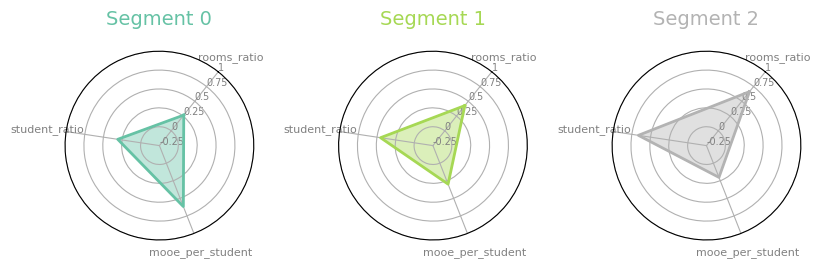

In [19]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))

In [22]:
master_data_e = pd.read_csv('Enrollment Master Data_2015_E.csv').set_index('School ID')
master_data_e.head(20)

,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female
School ID,,,,,,,,,,,,,,,,
100001.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0
100002.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0
100003.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0
100004.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0
100005.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0
100006.0,10.0,7.0,12.0,11.0,10.0,4.0,15.0,10.0,11.0,8.0,10.0,5.0,13.0,5.0,0.0,0.0
100007.0,11.0,13.0,4.0,14.0,12.0,11.0,13.0,15.0,10.0,9.0,14.0,13.0,18.0,8.0,0.0,0.0
100008.0,8.0,11.0,17.0,17.0,20.0,8.0,23.0,9.0,26.0,17.0,18.0,20.0,23.0,12.0,0.0,0.0
100009.0,6.0,6.0,12.0,13.0,14.0,14.0,9.0,7.0,7.0,11.0,6.0,16.0,9.0,10.0,0.0,0.0


In [23]:
final_data.shape

(30437, 4)

In [24]:
master_data_e.shape

(38649, 16)

In [52]:
finale1 = pd.merge(final_data, master_data_e, how='left', left_index=True, right_index=True)

In [53]:
finale1.head(2)

,rooms_ratio,mooe_per_student,student_ratio,Cluster_Labels,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
100001,45.0,933.333333,45.000000,1,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0
100002,38.0,587.719298,26.823529,1,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0


In [78]:
st_mean = finale1['student_ratio'].mean()
st_mean

37.943626044792616

In [81]:
finale1["Cluster_Labels"].mean()

1.030292078719979

In [85]:
room_mean = finale1['rooms_ratio'].mean()
room_mean

39.18554440542206

In [86]:
mooe_mean =  finale1['mooe_per_student'].mean()
mooe_mean

666.2236599754244

In [26]:
finale1.shape

(30437, 20)

In [30]:
finale1.isnull().sum()

rooms_ratio         0
mooe_per_student    0
student_ratio       0
Cluster_Labels      0
Kinder Male         0
Kinder Female       0
Grade 1 Male        0
Grade 1 Female      0
Grade 2 Male        0
Grade 2 Female      0
Grade 3 Male        0
Grade 3 Female      0
Grade 4 Male        0
Grade 4 Female      0
Grade 5 Male        0
Grade 5 Female      0
Grade 6 Male        0
Grade 6 Female      0
SPED NG Male        0
SPED NG Female      0
dtype: int64

In [75]:
for index, row in finale1.iterrows():
    st = 'high' if row['student_ratio'] > st_mean else 'low'
    room = 'high' if row['rooms_ratio'] > room_mean else 'low'
    mooe = 'high' if row['mooe_per_student'] > mooe_mean else 'low'
    print(index, st, room, mooe)


100001 high high high
100002 low low low
100003 low low high
100004 low low high
100006 low low high
100007 low low high
100008 low low high
100009 high high high
100010 low low high
100011 low low high
100012 high high high
100013 low low high
100014 low low high
100015 low low low
100016 low low high
100017 low low high
100018 low low high
100020 low low low
100021 low low high
100022 low low high
100023 low low high
100024 high high low
100025 low low high
100026 low high low
100027 low low high
100028 low low high
100029 high high low
100030 low low high
100032 low low high
100033 low low high
100034 low low high
100035 low low high
100036 low low low
100037 low low high
100038 low low high
100039 high high high
100040 low low high
100041 low high high
100042 low low high
100043 low low high
100045 low low high
100046 low low low
100047 low low low
100048 low low high
100050 low high low
100051 low low low
100053 low low high
100055 low low high
100056 low low high
100057 low low h

100509 low low low
100510 low low low
100511 low low low
100512 high low high
100513 low low high
100515 low low high
100516 high high high
100517 high high high
100518 low low high
100519 low low high
100520 low low high
100521 high low high
100522 high low high
100523 low low high
100524 high low high
100525 low high low
100526 low low high
100527 low low high
100528 low low low
100529 low low high
100530 high high high
100531 low low low
100532 low low high
100533 high high high
100534 low low low
100536 low low high
100537 low low high
100538 low low high
100539 low low high
100541 low low high
100542 low low low
100544 low high low
100545 low low high
100546 low low high
100548 low low low
100549 low low high
100550 low low low
100551 low low high
100553 low low high
100555 low low high
100556 low low high
100557 low low high
100560 low low high
100561 low low high
100566 low low high
100568 low low high
100569 low high high
100570 low low high
100571 low low high
100579 low low h

101032 low low high
101034 high high low
101035 low high low
101036 low low low
101037 high high low
101038 low high low
101039 high high low
101040 low low high
101041 low low low
101042 low low high
101043 low high low
101044 low low low
101045 low low high
101046 high low high
101047 low low high
101048 low low high
101049 low low high
101050 low low low
101051 low low high
101052 high high low
101053 low low high
101054 low low high
101055 low low high
101057 low low low
101058 low low high
101059 low low low
101060 low low high
101061 low low high
101062 low low high
101063 low low high
101064 low low low
101065 high high low
101066 low low high
101067 high low low
101068 low low low
101069 low low high
101070 low low high
101071 low low low
101072 high low low
101073 low low low
101074 high high low
101075 low low low
101076 low low low
101077 low low high
101078 low low low
101079 low low high
101080 low low low
101081 low low high
101082 low low low
101083 low low high
101085 l

101535 high high high
101536 low low low
101537 low low low
101538 low low low
101539 low low high
101540 high high low
101541 low low high
101542 high high low
101543 low low low
101544 low high low
101545 high high low
101546 high high low
101547 high low low
101548 high high low
101549 high high low
101550 low low low
101551 high high low
101552 low low high
101553 high low low
101554 high high low
101555 low low low
101556 high high low
101557 low high high
101558 high high low
101559 high high low
101560 high high low
101563 low low low
101564 high high low
101565 low high low
101566 high high low
101567 high high low
101568 high high low
101569 low low high
101570 high high low
101571 high low low
101572 high high low
101573 low low high
101574 low low high
101575 low low low
101576 high high low
101577 high low low
101578 high high low
101579 high high low
101580 low low high
101581 high high low
101582 high high low
101583 high high low
101584 high high low
101585 high high low

102080 low high low
102081 high high high
102082 high high low
102083 low low high
102084 high high low
102085 low high low
102086 low low low
102087 low low high
102088 high high high
102089 low low high
102090 low high low
102091 high high low
102092 low high low
102093 low high low
102094 low low high
102095 high low high
102096 high high low
102097 high high high
102098 high high low
102099 low low high
102100 low low high
102101 high high low
102103 high low high
102104 high low high
102105 high high low
102107 high high low
102108 high high high
102109 low high low
102110 high high low
102111 low low high
102112 high high low
102113 low low high
102114 low low high
102115 high high low
102116 high low high
102117 low low high
102118 high low high
102119 high high low
102120 low low low
102121 low low low
102122 low low low
102123 high high low
102124 high high low
102125 high high low
102126 low high low
102127 low low high
102128 low high low
102129 low low high
102130 low low h

102715 low low high
102716 low low low
102717 low low low
102718 low low high
102719 low low high
102720 high high low
102721 low low high
102722 low high low
102723 low low low
102724 low low high
102725 low low low
102726 low low high
102727 high high high
102728 low low low
102729 low low high
102730 low low high
102731 low high low
102732 low low low
102733 low low high
102734 low low high
102735 low low low
102737 low low high
102738 low low high
102739 low low high
102740 low low high
102741 low low low
102742 high low low
102743 high high low
102744 low low low
102746 low low high
102747 high high low
102748 low low low
102749 low low low
102750 low low high
102751 low low high
102754 low low high
102755 low low high
102756 low high low
102757 low low high
102758 low high low
102759 low low low
102760 low low high
102762 low low high
102763 low low high
102764 low low low
102765 high low low
102766 low low high
102767 low low high
102768 low low high
102769 low low high
102770 l

103173 low low high
103174 high high low
103175 low low high
103176 low high low
103177 high high high
103178 low low low
103179 low low low
103180 low low high
103181 low low high
103182 high low low
103183 low low high
103184 low low high
103186 low high low
103187 low low high
103188 low low high
103189 high low high
103190 high low high
103191 low low low
103192 high low low
103193 low low high
103194 low low high
103195 low low high
103196 high low low
103197 high high low
103198 high high low
103199 high high low
103200 low low low
103201 low low high
103203 low low high
103204 high high low
103205 high low high
103206 low low high
103208 high high low
103209 low low high
103210 low low low
103211 high high low
103212 low low high
103213 low low high
103214 low low high
103215 low low low
103217 low low high
103218 low low high
103219 low low high
103220 low high low
103222 high high low
103223 low high low
103225 high high low
103226 low high low
103227 low low high
103228 high 

103702 low low low
103703 low low high
103704 low low low
103705 low low high
103706 low low low
103707 low low low
103708 high low low
103709 high low low
103710 low low low
103712 low low high
103713 low low high
103714 high high low
103715 low low high
103716 low low high
103717 high low low
103718 low low high
103719 low low low
103720 low low high
103722 low low low
103723 low low high
103724 low high low
103725 low low high
103726 low high high
103727 low low high
103728 low low high
103729 high high low
103730 high low low
103731 high high low
103732 high high low
103733 high high high
103734 high high low
103735 high high low
103736 high high low
103737 high high low
103738 high low high
103739 high high high
103740 high low low
103741 high low high
103742 low low low
103743 high high high
103744 high high low
103745 high high high
103746 high low low
103748 high low low
103749 high high low
103750 high high low
103751 high high low
103752 high high low
103754 low low high
1037

104175 low low high
104176 low low high
104177 low low low
104178 low low high
104179 low low low
104180 low low high
104181 low low high
104182 low high low
104183 high high low
104184 high low low
104185 high high low
104186 low low high
104187 high high low
104188 high low low
104189 low low high
104190 low low low
104191 low low high
104192 low low high
104193 low low high
104194 low low low
104195 low low high
104196 low low high
104197 low high high
104198 low low high
104199 low low high
104201 high low high
104202 low low high
104204 low low high
104206 low low high
104207 high high low
104208 high low high
104209 low low low
104211 low low high
104213 low low low
104214 low low low
104215 low low low
104216 low low low
104217 low low high
104218 low low high
104219 low low low
104220 low low high
104221 low low high
104223 low low low
104224 low high low
104225 low low low
104226 high low high
104227 low low high
104229 low low high
104230 low low high
104231 low low low
10423

104722 high high low
104723 high high low
104724 high high low
104725 high high low
104726 high high low
104727 high high low
104728 low high low
104729 high low low
104730 high high low
104731 low high low
104732 high low low
104733 high high low
104734 high high low
104736 high high low
104737 high high low
104738 high high low
104739 high high low
104740 high high low
104741 high high low
104742 high high low
104743 high high low
104744 high high low
104745 high low high
104746 high high low
104748 high high low
104749 high high low
104750 high high low
104751 low high low
104752 high high low
104753 high high low
104754 high high low
104755 high high low
104756 high high low
104757 high high low
104758 high high low
104759 high high low
104760 high high low
104761 high high low
104762 high high low
104763 high high low
104764 high high low
104765 low low low
104766 high high low
104767 high high low
104768 high high low
104769 high high low
104770 high high low
104771 high high low

105217 high low low
105218 high high low
105219 low low low
105220 high high low
105221 low low low
105222 high high low
105223 high high low
105224 high high low
105225 high high low
105226 high high low
105227 low low low
105228 high high low
105229 high high low
105230 low low high
105231 low low high
105232 low high low
105233 low high low
105234 high high low
105235 high low low
105236 low high high
105238 high low low
105239 low high low
105240 high high low
105241 low high low
105242 low low low
105243 high high low
105244 low high low
105245 low low high
105246 low low high
105247 high high low
105248 high high low
105250 high low low
105251 high high low
105252 high high low
105254 low low high
105255 low high low
105256 high high low
105257 low low high
105258 high low low
105259 low low high
105260 high low high
105261 low low high
105263 low low low
105264 low low high
105265 low low low
105266 high high high
105267 low low high
105268 low high high
105269 low high low
1052

105646 high high low
105647 high high high
105648 low low low
105649 low low high
105650 high high low
105651 low low high
105652 high low low
105653 low high low
105654 high low low
105655 low low low
105656 high low low
105657 low low low
105658 low low high
105659 high high high
105660 high high low
105661 high high low
105662 low high low
105663 low low low
105664 high high low
105665 low low low
105666 high high low
105667 low low high
105668 high high low
105669 high high low
105670 low high low
105671 high high low
105672 high high low
105673 low low high
105674 high high low
105675 high high low
105676 low high low
105677 low low low
105678 low low high
105679 low low low
105680 low low high
105681 low high low
105682 low low high
105684 low high low
105685 low low low
105686 low high low
105687 low high low
105688 low high low
105690 low high low
105691 high low low
105692 high low low
105694 low low high
105695 high low low
105696 high high low
105697 high low low
105698 high

106108 high high low
106109 high high low
106110 low low high
106111 low high low
106112 low low high
106113 low low high
106114 low high low
106115 low low high
106116 low low high
106117 high low low
106118 low high low
106119 low low low
106120 high high low
106122 low low low
106123 low high low
106124 low low high
106125 low low high
106126 low low high
106127 low low low
106128 high high low
106129 high high low
106130 high low low
106131 high high low
106132 high high low
106133 high high low
106134 high high low
106135 high high low
106136 high high low
106137 low low high
106138 low low low
106139 high low low
106140 high high low
106141 high high low
106142 high low low
106143 low low low
106144 low low high
106145 low high low
106146 high high low
106147 low low low
106148 low low low
106149 low low low
106150 low low high
106151 high low low
106152 low low low
106153 low low low
106154 high low low
106155 low high low
106156 low high low
106157 low low high
106158 high high

106542 low high high
106543 low low low
106544 low low low
106545 low low high
106546 low low high
106547 low low high
106548 low low low
106549 high high low
106550 low high low
106551 high high low
106552 high high low
106553 high high low
106554 low low high
106555 high high high
106556 high low low
106557 high high low
106558 high high low
106559 low low low
106560 high low low
106561 low low low
106562 low low low
106563 high high high
106564 low low low
106565 low low low
106566 low low high
106567 low high low
106568 high high low
106569 low low low
106570 high high low
106571 low low low
106572 high high low
106573 high low low
106574 low low high
106576 high low low
106577 high low low
106578 low low high
106579 low low high
106580 low low high
106581 low low high
106582 high high low
106583 low low high
106584 low low high
106585 high high low
106586 low low high
106587 high high low
106588 low low low
106589 low low high
106590 low low high
106591 low high low
106592 low low

106965 low low low
106966 low low high
106967 low high high
106968 low low low
106969 low low high
106970 low high low
106971 low low high
106972 low low high
106973 low low high
106974 low low high
106975 low low high
106976 low low high
106977 low low high
106978 low low high
106979 high high low
106980 low low high
106981 low low low
106982 low low low
106983 low low low
106984 low low low
106985 low low high
106986 low high low
106987 low low high
106988 low low high
106989 high high low
106990 low high low
106992 low high low
106993 low low low
106994 low low low
106995 high low low
106996 high low low
106997 low low low
106998 low high low
106999 low high low
107000 low low low
107001 low low high
107002 high high low
107003 low high low
107005 low low high
107006 high high low
107007 high high low
107009 high low low
107010 high high low
107012 high high low
107014 high high low
107016 high high low
107017 high high low
107018 high high low
107019 high high low
107020 high high 

107558 low high low
107559 low low high
107561 high high low
107562 high low low
107564 high high low
107565 high high low
107567 low high low
107568 low high low
107573 high high low
107575 high high low
107578 low low high
107579 high low high
107582 low low high
107585 high low high
107588 low high low
107590 low low high
107592 high low low
107594 high high low
107596 high high low
107597 high high low
107598 high high low
107599 high high low
107600 high high low
107602 high high low
107603 high low low
107604 low high low
107605 high high low
107606 low high low
107607 low high low
107608 high high low
107609 high high low
107610 low high low
107611 low low high
107612 high high low
107613 high high low
107614 low low high
107615 high low low
107616 high high low
107617 low high low
107618 high high low
107620 low low high
107621 high high low
107622 high high low
107623 low high low
107625 high high low
107626 low high low
107627 high high low
107628 high high low
107629 high lo

108175 high high low
108176 low high low
108180 high high low
108185 high high low
108187 high high low
108188 high high low
108189 high high low
108190 low low high
108191 high high low
108192 high high low
108193 high high low
108194 high high low
108195 high high low
108196 high high low
108197 low low low
108198 low low high
108199 high high low
108200 high high low
108201 high high low
108202 high high low
108203 high high low
108204 high high low
108205 high high low
108206 high high low
108208 high high low
108209 high high low
108210 high high low
108211 high low low
108212 high high low
108213 high high low
108214 high high low
108215 high high low
108216 high high low
108217 high high low
108218 high high low
108219 high high low
108223 high high low
108224 high high low
108226 high high low
108227 high high low
108228 high high low
108229 high high low
108230 high high low
108231 high high low
108232 low high low
108233 high high low
108236 high high low
108237 high high low

108731 low low low
108732 low low high
108733 high high low
108734 high low low
108735 low low high
108736 high high low
108737 high high low
108738 low high low
108739 low high low
108740 high high high
108741 low low high
108742 high low low
108743 high high high
108744 high low high
108745 low low low
108747 low high low
108748 low low high
108749 high high high
108750 high high low
108751 low low high
108752 high high low
108753 high high low
108754 high high low
108755 high high low
108756 low low low
108758 low low high
108759 high high low
108760 high high low
108761 high high low
108762 high low low
108763 high high low
108764 high high low
108765 high high low
108766 low low high
108767 low high low
108769 high high low
108770 low low high
108771 high high high
108772 high high low
108773 high high low
108774 low high low
108775 low high high
108776 low high low
108777 high high low
108778 high high high
108779 low low high
108780 high high low
108781 high high low
108782 low 

109261 high high low
109262 high high low
109263 high high low
109264 high low high
109265 high high low
109266 high low low
109267 high high low
109268 high high low
109269 high high low
109270 high high low
109271 high high low
109272 high high low
109273 high high low
109274 high high low
109275 high high low
109276 high high low
109277 low low high
109278 high high low
109279 high high low
109280 high high low
109281 high high low
109282 high high low
109283 high high low
109284 high high low
109285 high high low
109286 high high low
109287 high high low
109288 high high low
109289 low low high
109290 high high low
109291 low low low
109292 low high low
109293 low low high
109294 low low high
109295 low low high
109296 low high low
109297 high high low
109298 low low high
109299 low low high
109300 low high low
109301 low low high
109302 high high high
109303 low low high
109305 low low low
109306 low high low
109309 high high low
109310 high high low
109312 high high low
109313 hi

109780 low low low
109781 low low low
109782 low high low
109784 high high low
109786 low high low
109787 low low low
109788 high high low
109790 high high low
109791 low low low
109792 low low high
109793 high high low
109794 low low low
109795 high high low
109796 high high low
109797 high high low
109799 high high low
109800 high high low
109801 high high low
109802 high high low
109803 high high low
109804 low high low
109805 high high low
109806 low high low
109807 low low low
109808 high low low
109809 high high low
109810 low low high
109811 high low low
109812 low high low
109814 high high low
109815 high high low
109816 high high low
109817 high high low
109818 high high low
109819 high high low
109820 high high low
109821 high high low
109822 high high low
109823 high high low
109825 high high low
109826 high high low
109827 high high low
109828 high high low
109829 high high low
109830 high high low
109831 high high low
109832 high high low
109834 high low low
109835 high hi

110274 high low high
110275 low high low
110278 high low low
110280 high low high
110281 high low high
110282 low high low
110283 high low high
110285 high low low
110286 high high high
110287 high low high
110288 high high low
110290 high high low
110291 low low low
110292 low high low
110296 high low low
110297 high high low
110298 low low low
110299 high high low
110300 high high high
110301 high low low
110302 low low high
110303 high high low
110304 low low low
110305 low low low
110306 high low low
110307 low low high
110310 high low low
110311 low low high
110312 low high low
110314 high low high
110315 high high low
110316 low high high
110317 high high low
110318 high low high
110319 high high low
110320 low low low
110321 high low low
110326 high high low
110327 low low high
110328 low low low
110329 low low high
110330 low low high
110331 high low low
110332 low low low
110333 low low high
110334 high low high
110336 low low high
110338 high high low
110340 high high low
110

110739 low low high
110740 low low high
110741 high high low
110743 low low high
110745 low low high
110746 low low high
110747 low low high
110748 high high high
110749 low high low
110750 low low high
110751 high low high
110752 low low high
110753 low low high
110754 low high low
110757 high high low
110759 low low high
110760 low low high
110761 high high high
110762 high high high
110763 low low high
110765 high high low
110766 high high high
110767 low low high
110768 high high high
110769 high low low
110771 high low high
110772 high high low
110773 low high high
110774 high high high
110775 low low high
110777 high low high
110778 high high high
110779 low low high
110780 low low high
110781 high low high
110782 low high high
110783 low low high
110784 low high low
110785 low high high
110786 high low high
110787 low low high
110788 high high low
110789 high high low
110791 high high low
110792 high high low
110794 high high high
110796 low low low
110797 high high low
110799 h

111311 low low high
111312 low low high
111313 low low high
111314 low low high
111315 low low high
111316 low low high
111317 low low high
111318 low low high
111319 low low high
111320 low high low
111321 low low high
111322 low low low
111323 low low high
111324 low high low
111325 high low low
111326 low high low
111327 low low high
111328 low low low
111329 low high low
111330 low low high
111331 low low high
111332 low high low
111333 low low high
111334 low low high
111335 low low low
111336 low low low
111337 low low high
111338 low low high
111339 low low low
111340 low low low
111341 low low high
111342 low low low
111343 low low high
111344 low low low
111345 low low low
111346 high low high
111347 low low high
111348 low low high
111349 low low high
111350 low low high
111351 low low high
111352 low low low
111353 low low high
111354 low low high
111355 low low high
111356 low low low
111357 low low high
111358 low low low
111359 low low high
111360 low low high
111361 low 

111776 low low low
111777 low high low
111778 high high low
111779 low low low
111780 low low high
111781 high high low
111782 low low high
111783 low low low
111784 high high low
111785 high high low
111786 high low low
111787 high low low
111788 high high low
111789 high high low
111791 high high low
111793 high low high
111794 high high low
111795 low low low
111796 high high low
111797 low low high
111798 high high low
111799 low low high
111800 low high high
111801 high high low
111802 high high low
111803 high high low
111805 high low low
111806 high high low
111807 high low low
111808 low low low
111809 low high low
111810 high high low
111811 low low low
111812 low low low
111813 high low low
111814 low low low
111815 high high low
111816 high high low
111817 low low low
111818 high high low
111819 low low low
111820 high high low
111821 high high low
111822 low low low
111823 low low high
111824 high high low
111825 low high low
111826 low high low
111827 high high low
111828 

112237 low high high
112238 high high low
112239 high low low
112240 high high low
112241 high high low
112242 high high low
112243 high high low
112244 high high low
112245 high low low
112246 high low low
112247 high high low
112248 low low high
112249 low low high
112250 high high low
112251 high high low
112252 low low low
112253 high low high
112254 high high low
112255 high high low
112256 high high low
112257 high high low
112258 high high low
112259 high high low
112260 high high low
112261 high high low
112263 high low low
112264 high high low
112266 high high low
112267 low low high
112268 high low low
112269 high low high
112270 low low low
112271 low high low
112272 low low high
112273 high high low
112274 low low high
112275 low high low
112276 low low high
112277 low low high
112278 high high low
112279 high high low
112280 high high low
112281 high high low
112282 high high low
112283 low low high
112284 high low high
112285 high high low
112286 low low high
112287 low l

112770 high high low
112771 high high low
112772 high high low
112773 high high low
112774 high high low
112775 high low low
112776 high high low
112777 high high low
112778 high high low
112779 high high low
112780 low low low
112781 high high low
112782 high high high
112783 low low low
112784 high low high
112785 high high low
112786 high high low
112787 low low low
112788 high high low
112789 high high low
112790 high high low
112791 high high high
112792 low low high
112793 high high low
112794 high high high
112795 high high low
112796 high high low
112797 high high low
112798 high high low
112799 high high low
112801 high high low
112802 high high low
112803 low low low
112804 low high low
112805 high high low
112806 high high low
112807 low low low
112808 low high low
112810 low low high
112811 high high low
112812 high low low
112813 high high high
112814 high low low
112815 low low high
112816 high low low
112817 low low low
112818 high high low
112819 low low high
112820 low

113350 low low low
113351 low low high
113352 low high low
113353 low low high
113354 low low high
113355 low low high
113358 low low high
113359 low low low
113360 low low high
113361 low low high
113362 low low high
113363 low low high
113364 low low high
113366 low low high
113368 low low low
113369 low low high
113370 low low high
113371 low low high
113372 low low high
113373 low low low
113374 high high low
113375 high low high
113376 high high low
113377 high high low
113378 high high low
113379 high low high
113380 high high low
113381 high high low
113382 high high low
113383 high high low
113385 high high low
113386 high low low
113387 high high low
113388 high high low
113389 high high low
113390 high high low
113391 high high low
113392 high high low
113393 high high low
113394 high high low
113395 high high low
113396 high high high
113398 low low high
113399 high high low
113400 high high low
113401 high high low
113403 high high low
113404 high high low
113406 high low l

113905 high high low
113906 high high low
113907 high high low
113908 high low low
113910 high high low
113911 high high low
113912 low low high
113914 high low high
113915 high high low
113916 high high high
113917 high high low
113918 high low low
113920 high low low
113921 low low high
113922 high high low
113923 high high low
113924 high high low
113925 high high low
113926 high high low
113927 high low low
113928 low low low
113929 high high high
113930 low low low
113931 high high low
113932 low low high
113933 high high low
113934 low high low
113935 low high low
113936 low low low
113937 high high low
113940 high low high
113941 high high low
113942 high low high
113943 low low low
113944 high low low
113945 low low low
113946 low low low
113947 low high low
113948 low low high
113949 high high low
113950 low high low
113951 high high low
113952 low low high
113953 high high low
113954 high high low
113955 low low high
113956 high high low
113957 high high low
113958 high high 

114403 low low high
114404 low low high
114406 low low low
114407 low high high
114408 low low high
114409 low low high
114410 low low high
114411 high high low
114412 high low low
114413 low low high
114414 low low high
114415 low high low
114416 low low low
114417 high high high
114418 high high low
114419 low low low
114420 high high low
114421 high high low
114422 high low low
114423 low low low
114424 high high low
114425 low low high
114426 low low low
114427 low high low
114428 low low low
114429 low low low
114430 low low low
114431 low low low
114432 low high low
114433 low low high
114434 low low low
114435 low low high
114436 low low low
114437 low low high
114438 low high low
114439 low low high
114441 low low high
114442 high high low
114443 low low low
114444 low low low
114445 low low low
114446 high low low
114447 low low low
114448 low low low
114449 low low low
114450 low low low
114451 low low low
114452 low low low
114453 low low low
114454 high low low
114455 low l

114932 low low low
114933 high low low
114934 high low low
114935 low low low
114936 low low low
114937 low low high
114938 low low high
114939 low low low
114940 high low low
114941 low low high
114942 low low high
114943 low low high
114944 low low high
114945 low high low
114946 low low low
114948 high high high
114949 low low high
114950 low low high
114951 low low high
114952 low high low
114953 low low high
114954 low low high
114956 low low high
114957 low low high
114958 low low low
114959 low low high
114961 high high low
114962 low low high
114963 low low high
114964 low low high
114965 low high low
114966 high low low
114967 low low high
114968 high low high
114970 low low high
114972 low low high
114973 low low low
114974 low low high
114975 low low high
114976 low low high
114977 low low high
114978 low low high
114979 low low high
114980 low low high
114981 high high high
114983 low high high
114986 low high low
114987 low low high
114988 low low low
114989 low high high


115584 low low high
115585 low low high
115586 low low high
115587 low low high
115588 low low high
115589 low low high
115590 low low low
115591 low low high
115592 low low high
115593 low low high
115594 low low high
115595 low low high
115596 low low high
115597 low high low
115598 low low high
115599 low low high
115600 low low low
115601 low low high
115602 low low low
115604 low low low
115605 low low high
115607 low low high
115609 low low high
115610 low low high
115611 low low low
115612 high low low
115613 low low low
115614 low low high
115615 low high high
115616 low low high
115617 low low low
115619 low low high
115620 low low low
115621 low low high
115622 low low low
115623 low low high
115624 low low high
115625 low low high
115627 low low high
115628 low low high
115630 high low high
115631 low low high
115632 low low high
115633 low low high
115634 low low high
115635 low low low
115636 low low low
115637 low low low
115638 low high low
115639 low high high
115640 lo

116177 low low high
116178 high high low
116179 low high low
116180 high high high
116181 low low low
116184 low low low
116186 low low low
116187 high high low
116188 low low high
116189 low low high
116193 low low high
116194 low low low
116195 high low low
116196 low low high
116198 high high low
116199 low low high
116201 high high low
116202 high high low
116203 high high low
116204 high high low
116205 high high low
116206 high high low
116207 high high low
116208 low high high
116209 low low low
116210 low high low
116212 low high low
116213 low low low
116214 high high high
116215 high high high
116217 high high low
116218 high high low
116221 high low low
116222 low high high
116223 high high high
116225 low low high
116226 high high low
116227 high high low
116228 high high low
116229 high high low
116232 high high low
116233 high high low
116236 low low high
116237 high high low
116238 low low high
116239 low low high
116240 low low high
116241 high high low
116242 low high 

116852 low low high
116853 low low high
116855 low low low
116856 low low low
116857 low low high
116858 low low high
116859 low low low
116860 high high low
116861 low low low
116862 low low low
116863 low high low
116864 high high low
116865 low low low
116866 high high low
116867 low high low
116868 high high low
116869 low low high
116870 high high low
116871 low low low
116872 high high low
116873 high high high
116874 low low high
116875 high low low
116876 high low low
116877 low low high
116878 high high low
116879 high high low
116880 low low low
116881 high high low
116882 low low low
116883 low low low
116884 high high low
116885 low high low
116886 high high low
116887 low low low
116888 high high low
116889 low low low
116890 high high low
116891 low high low
116892 low low low
116893 low low high
116894 low high low
116895 high low low
116896 low low high
116897 low low high
116898 low low low
116899 low low high
116900 high high low
116901 low high low
116902 low low hig

117308 high high low
117309 low low high
117310 low low high
117311 low low low
117312 high low low
117313 low low low
117314 low low high
117315 low low low
117316 low low low
117317 low high low
117318 low low high
117319 low low high
117320 low low high
117321 low low high
117322 low low low
117323 low high low
117324 low low low
117325 low low low
117326 high high low
117327 high high low
117328 low low high
117329 high low low
117330 low low low
117331 high high low
117334 low high low
117335 high high low
117336 high high low
117337 high high low
117339 low low low
117340 high high low
117341 low low low
117342 low low low
117343 low high low
117344 low low high
117345 low low high
117346 low low low
117347 low low low
117348 high high low
117350 high high low
117351 high high low
117352 high high low
117353 high high low
117354 high high low
117355 high high low
117356 high high low
117357 low high low
117358 high high low
117359 low low low
117360 high low low
117361 high high 

117848 high high low
117849 high low low
117850 high low low
117851 high high low
117852 high low low
117853 high high low
117854 high high low
117855 high low low
117856 high high low
117857 high low high
117858 high high low
117859 high high low
117860 low low low
117861 high low low
117862 high high low
117863 high high low
117864 high high low
117866 low low high
117867 high high low
117869 high high low
117870 high high low
117871 high high low
117872 high low low
117874 high high low
117875 high low low
117876 high high low
117877 high low low
117879 low low high
117880 high high low
117881 high high low
117882 high high high
117884 high high low
117885 high high low
117886 low low low
117887 high high low
117888 high high low
117889 high high low
117890 high high low
117892 high high low
117893 high high low
117894 high high low
117895 high high low
117896 high low low
117897 low low high
117898 low low high
117899 low low low
117900 high high low
117901 low high high
117902 low

118366 low low high
118367 high high low
118370 high high low
118373 high high low
118376 high low high
118378 low high low
118379 low high high
118380 low low high
118381 high low low
118383 low low low
118384 low low high
118385 high low low
118387 low high high
118388 low low low
118389 low low high
118391 low low high
118392 high high high
118393 low low high
118395 low low high
118397 low low low
118398 high high low
118399 low high low
118402 low high high
118403 low low high
118404 low low high
118405 low low high
118407 low low low
118409 high low high
118410 high high low
118411 low low high
118412 low low high
118414 low high low
118415 low low high
118416 high high low
118417 high high low
118418 low low high
118419 low low high
118420 low high low
118421 low low high
118422 low low high
118423 low low high
118424 low high low
118426 low low high
118427 low low low
118428 low low high
118429 high high low
118430 high high low
118431 low low high
118432 low high low
118433 lo

118927 low low high
118928 high high high
118929 high high low
118930 high high low
118931 low low low
118933 low high high
118934 high high low
118935 high low low
118936 high high high
118937 high high low
118938 low low low
118939 high low low
118940 high low high
118941 low low high
118943 high high low
118944 high high low
118945 high high low
118946 low low low
118947 low low low
118948 low low low
118949 low low high
118950 high high low
118951 low low high
118952 low low high
118953 low low high
118954 high high low
118955 low low high
118956 low low low
118958 low low low
118960 high low high
118961 high high high
118962 high high low
118963 low low high
118964 high high high
118965 high high low
118966 high high low
118967 high high low
118969 high high high
118970 high high high
118973 high high low
118976 high high high
118977 high high high
118978 high high low
118979 high high low
118981 high high low
118982 high high high
118983 high high low
118984 high high low
118985 

119500 high high low
119501 high high low
119502 high high low
119503 high high low
119504 high high low
119505 high high low
119506 high high low
119507 high low low
119508 high high low
119509 high high low
119510 high high low
119511 high high low
119512 high high low
119513 high high low
119514 high high low
119515 high low low
119516 high high low
119517 high high low
119519 high high low
119520 high high low
119521 high high low
119522 low low high
119523 high high low
119524 high high low
119525 low low high
119526 high high low
119528 high high low
119529 high high high
119530 high low high
119531 high high low
119532 high high low
119533 high high high
119534 low low low
119535 low low high
119537 high high low
119538 high high low
119539 high high low
119540 high high low
119542 low high low
119543 low low high
119544 low low high
119545 low low high
119546 low low high
119547 low high low
119548 high low high
119549 low low low
119551 low low high
119552 high high low
119553

120071 high low high
120073 high high low
120074 high high low
120075 high high low
120076 high high low
120077 low low high
120078 high high low
120079 high high low
120080 high high low
120081 high low low
120082 low low high
120083 low low low
120084 high high high
120085 high high low
120086 low low high
120087 high high low
120088 low low low
120089 low low high
120090 low low low
120091 low low low
120092 high high low
120093 high low low
120094 high low low
120095 high low low
120096 high high low
120097 high high low
120098 high high low
120099 high low high
120100 low low low
120101 high high low
120102 high high low
120103 high high low
120104 high high low
120105 high high low
120106 high low high
120107 high high low
120108 high high low
120109 high high low
120110 high high high
120112 high high low
120113 high low high
120114 high high low
120115 high high low
120116 high high low
120117 high high low
120118 low low high
120119 low high low
120120 high high low
120121 low

120630 low high low
120631 high high low
120632 low low high
120633 high low low
120634 high high low
120635 high high low
120636 high high low
120637 high high low
120638 low high low
120639 high high low
120640 high low high
120641 high high low
120642 low high low
120643 high high low
120644 high high low
120645 high high low
120646 high low low
120647 high high low
120648 low low high
120649 low low high
120650 high low low
120651 low low low
120652 low low high
120653 high high low
120654 low low low
120655 low low high
120656 low low high
120657 low low high
120658 low low high
120659 low low low
120660 low low high
120661 low low high
120663 low low high
120664 low low high
120665 low low high
120666 low low high
120667 low low low
120668 low low low
120669 low low high
120670 low low high
120671 low low high
120672 low low high
120673 low low high
120674 low low high
120675 low low high
120676 low low high
120677 low low low
120678 low low high
120679 low low high
120680 low lo

121169 low low high
121170 low low high
121172 low high high
121173 low low high
121174 low low high
121177 low low high
121178 low low high
121179 low low high
121180 low high low
121181 low low low
121182 high high high
121184 low low low
121185 low low low
121187 high low high
121189 low high high
121190 low low high
121191 low low high
121192 low low high
121194 high low high
121195 low low high
121196 high high high
121197 low low low
121198 low high high
121199 high low high
121201 low high high
121203 high high high
121204 low low high
121205 low low low
121206 low low high
121208 high high high
121209 low low high
121210 low low high
121211 low low high
121212 low low low
121214 high low low
121215 low low high
121216 low low low
121218 low low high
121220 low low low
121221 low low high
121222 high low high
121223 low high low
121224 low low high
121225 low low low
121226 low low high
121227 low high high
121228 low low high
121229 low low high
121230 low low high
121231 low l

121776 low high low
121777 low low low
121778 low low high
121779 low low low
121780 low low high
121781 low low high
121782 low low high
121783 low low high
121784 low low high
121786 high low low
121787 low low high
121788 low high high
121790 low low low
121791 low low high
121792 low low high
121794 low low low
121795 low low high
121796 low low high
121797 low low high
121798 low low low
121799 low low low
121800 low low high
121801 low low high
121802 low low low
121803 low low high
121807 high high low
121808 low low high
121810 high low high
121812 high high high
121813 low high high
121814 low high low
121815 low low high
121817 high high high
121818 high high high
121819 high high high
121821 high low low
121822 low low high
121823 low low high
121824 high high high
121825 low low low
121827 low low high
121828 high low low
121829 low low low
121830 low low low
121831 low low low
121832 low low high
121833 low high low
121834 high high low
121836 low low low
121837 low high h

122378 high low high
122379 low low low
122380 low low high
122381 low low high
122382 low low low
122385 low high low
122386 high high high
122387 low low low
122388 low low high
122389 low low high
122390 low low low
122393 low low high
122394 high low high
122395 high high low
122397 low low low
122398 low low high
122399 low high low
122401 low low high
122402 low low high
122403 low low high
122404 low low high
122405 high high high
122407 low low low
122408 high low high
122409 high low low
122410 high low high
122411 high low high
122412 high high low
122413 low high low
122414 high high low
122415 low low high
122416 low low high
122417 low low high
122418 high low high
122420 low low high
122421 low low high
122422 high high high
122423 high high high
122424 low low high
122425 high high low
122426 high low high
122427 low low high
122429 high low low
122430 high low low
122431 low low high
122432 high high high
122433 low high low
122434 low high low
122435 low low low
122436

123016 low low high
123017 low low high
123019 high high high
123021 high high high
123022 high high high
123023 low low low
123024 high high high
123025 low low high
123027 low low high
123028 low high high
123033 high high high
123034 high high low
123037 low low high
123038 high high low
123039 high high high
123040 high high high
123041 high high high
123042 high low high
123044 high high low
123046 low high low
123048 high high high
123049 high high low
123051 low low high
123052 high high high
123053 high high low
123056 low low high
123058 low low low
123059 high low high
123062 low low high
123064 low high low
123065 low low low
123066 high high low
123067 high high low
123068 high high low
123069 high high high
123070 low low low
123071 high high high
123072 high high high
123073 high high low
123074 low high low
123075 high high high
123076 low high low
123077 low low low
123078 low low high
123079 low low high
123080 high high low
123081 high high low
123083 high low high
12

123721 low low high
123724 low low low
123725 low low low
123726 low low high
123727 low high high
123728 high high high
123730 low low high
123737 low low low
123738 low high low
123742 high high low
123745 low high high
123746 low high high
123747 high high high
123749 low high low
123750 low low low
123753 low high low
123755 low high low
123757 high low low
123758 high high high
123760 low low high
123762 high high high
123763 low low high
123764 high low high
123766 low low high
123767 high high low
123768 low low high
123770 high low high
123771 high high high
123772 high low low
123773 low low high
123775 high high high
123776 high high low
123778 high low high
123779 high high low
123781 high high low
123786 high high low
123787 high high low
123790 high high low
123791 high high low
123792 high high high
123793 high low high
123794 high low low
123795 low low high
123796 high low low
123798 high low high
123799 low low low
123802 low low high
123803 low low high
123805 low hig

124383 low low high
124384 high high high
124385 low low low
124386 low low low
124387 low low high
124388 high high high
124389 low low low
124390 high high low
124391 high low high
124392 low low high
124393 low low high
124394 low high low
124395 low low high
124396 low high low
124397 low low high
124398 low low high
124399 low low high
124400 low low high
124401 low low high
124402 low low high
124405 low low high
124406 low low high
124407 low high low
124408 high low low
124409 low low low
124410 high high low
124411 high high low
124412 high high low
124413 low low low
124414 high low high
124415 low high low
124416 low high low
124417 low low low
124418 high high low
124419 low low low
124420 low low low
124421 low high low
124422 high high low
124423 high high low
124424 low high low
124426 low low high
124427 high high low
124428 low high low
124429 low low low
124430 high high low
124431 high low high
124433 high high low
124434 low low low
124435 low low high
124437 high h

124944 low low high
124945 low low high
124946 high low high
124948 high low high
124949 low low low
124950 high high low
124951 high low high
124952 high high low
124954 high high low
124955 low low low
124956 low low high
124959 low low high
124960 low low high
124961 low low low
124962 high low high
124963 high high low
124964 low low low
124965 high low low
124966 low low high
124967 low low low
124968 low high low
124969 low low low
124970 high high high
124971 low high low
124972 high low high
124973 high low high
124974 high low low
124975 high low low
124976 low low low
124977 high high high
124978 high low low
124979 high low low
124980 high low high
124981 high high high
124984 low low low
124985 high high low
124987 low low high
124988 low high high
124989 low low low
124990 low low high
124991 low low high
124992 low low high
124993 low low high
124994 high low high
124995 low low low
124996 high low high
124997 low high low
124998 low low high
124999 low low high
125000 lo

125522 low low low
125523 high low low
125524 low low low
125525 high high low
125526 low low low
125528 low low low
125530 low low high
125531 low low high
125532 high low low
125533 high low low
125534 high high low
125535 high high low
125537 high low low
125539 low low low
125540 low low high
125541 high high low
125543 low low low
125544 low high low
125546 low low low
125549 low low high
125550 low low low
125552 high low high
125553 low low high
125554 low low high
125555 low low low
125556 high low low
125557 low low low
125558 low low low
125559 low high low
125560 low low high
125561 low low high
125562 low low low
125563 high low low
125564 high low low
125565 high low high
125566 low low low
125567 high low low
125568 high low low
125569 low low high
125570 high high low
125571 low low low
125572 low low high
125574 high low high
125576 low low high
125577 high high high
125578 low low high
125579 low high low
125580 low low high
125581 low low high
125582 low low high
1255

126093 low high low
126095 high high low
126096 low low low
126098 high low low
126099 high high high
126100 high high low
126101 low low high
126102 high low low
126103 high high low
126104 high high low
126105 low low high
126106 high high low
126107 low low high
126108 low low low
126109 high low low
126110 low low low
126111 high high low
126112 high low low
126113 high high low
126114 high high low
126115 low low high
126116 high high low
126117 high low low
126118 low low high
126119 high low high
126120 high low low
126121 high low low
126122 high low low
126123 high low high
126124 high low low
126125 low low high
126126 high high low
126127 high low low
126128 high low low
126129 low low high
126130 high low high
126131 high high low
126132 high high high
126133 high low high
126135 high high low
126136 high low low
126137 low low high
126138 low high low
126139 low low high
126140 high high low
126141 low low high
126143 high low low
126144 low low high
126145 high low low
12

126609 high high high
126610 high high low
126611 high high low
126612 high low high
126613 high high low
126614 low low high
126615 high low high
126616 high high low
126617 low low high
126618 high high high
126619 high high low
126620 high high low
126621 low low high
126622 low low low
126625 high high low
126626 high high low
126627 high high low
126628 high low high
126629 high high low
126630 high high low
126631 high high low
126632 high high low
126633 high high low
126634 high high low
126635 high high low
126636 high high low
126637 high high low
126638 high high low
126639 high high low
126640 low high low
126641 high high high
126642 high high low
126643 high high low
126644 high high low
126645 high high low
126646 high high low
126647 high high low
126648 high high high
126649 high high low
126650 high low low
126651 high high low
126652 high high low
126654 high high low
126655 high high low
126656 high high low
126657 high high low
126658 high high low
126659 high high

127158 high high low
127160 high high low
127161 high low low
127163 low high low
127164 high high high
127166 low high low
127168 high high low
127170 high high low
127172 low high high
127173 high high high
127174 high low high
127176 high high low
127177 low low high
127178 high low low
127179 low low high
127183 low low high
127184 low low low
127185 high low low
127186 high low high
127187 high high low
127188 low low high
127192 high high high
127193 low low high
127194 low low low
127196 low low low
127199 high high low
127201 low low high
127202 low low low
127204 low low high
127205 high high low
127206 low low low
127209 low high low
127210 low high low
127211 high high low
127213 high high low
127214 high high low
127215 high high low
127216 high high low
127217 low low low
127218 high high low
127220 high high high
127221 low low low
127222 high low low
127223 low low high
127224 high high low
127225 low low low
127226 low low high
127227 low low high
127228 low low low
127

127804 high low high
127805 high high low
127806 low low low
127807 high low low
127808 low high low
127809 high high low
127810 low low high
127812 low high low
127813 high low high
127814 high low low
127815 low low high
127816 high low high
127817 high high low
127818 low high high
127819 high low high
127821 low high low
127822 high high high
127823 high high low
127824 high low high
127825 low low high
127826 low high low
127827 low high low
127828 high high high
127831 low low high
127832 high high low
127833 low low high
127834 high high low
127835 high high low
127837 high low high
127841 low low high
127842 high high low
127843 low low low
127844 low low high
127845 high low high
127847 high high low
127848 high high low
127849 high high high
127851 low low high
127852 low low high
127853 low low high
127854 high high low
127856 low high low
127857 low low high
127858 high high high
127859 low high high
127860 high high low
127861 low low low
127862 low low low
127863 low low 

128347 high high low
128348 high high low
128349 low low high
128350 low low low
128351 high high low
128352 low low high
128353 low high low
128354 high high high
128355 high high high
128357 high low high
128358 high high low
128359 high low low
128360 high low high
128362 high low high
128363 low high low
128365 high high low
128366 high high low
128368 low low low
128369 low high low
128371 high low high
128373 high low low
128374 low low high
128375 high high low
128376 high high low
128377 high high low
128378 high high low
128379 low high low
128380 high low low
128381 high high low
128382 high high low
128383 high high low
128384 high high low
128385 high high low
128386 low high high
128388 high high low
128389 high high low
128390 high high low
128391 high high low
128392 high high low
128393 high low high
128395 low low low
128396 high high low
128397 high high low
128398 low low high
128399 high high high
128400 high high low
128401 low low high
128402 high high low
128403 

128848 high high low
128849 high low low
128850 high high low
128851 high high low
128852 high high low
128853 high high low
128854 low low low
128855 high high low
128856 high high low
128857 high low low
128858 low low high
128859 low low low
128860 high high low
128861 high low low
128862 low low high
128863 low low high
128864 low low high
128865 high high low
128866 low low low
128867 high low low
128868 high low low
128869 low low high
128870 high high low
128871 high high low
128872 low low low
128873 low low low
128874 low low low
128876 high high low
128878 high high low
128879 high high low
128880 high high low
128881 high high low
128882 high high low
128884 high high low
128885 high high low
128886 high high low
128887 high high low
128888 high high low
128889 high high low
128891 high high low
128893 high high low
128896 low high high
128897 low low low
128899 low low low
128900 low low high
128901 low high high
128902 high high low
128903 high high low
128904 high high lo

129359 low low high
129360 low low high
129362 high high high
129363 high low low
129365 high low high
129366 high low low
129367 low low high
129368 high high low
129369 low high low
129371 high high high
129373 low high low
129374 low low low
129375 low low high
129376 low low low
129377 low high low
129378 low low low
129379 low low high
129380 low high low
129381 low low low
129382 low high low
129383 low high low
129384 low low high
129385 high high low
129386 low low high
129387 low low high
129388 high high low
129389 low high low
129390 low high low
129391 high high low
129392 low low low
129393 low low high
129394 low low high
129395 high high low
129396 high high low
129397 high low low
129398 low high low
129399 high high low
129400 low high low
129401 high low low
129402 low low high
129403 low low high
129404 high high low
129405 low low low
129406 low low high
129407 low high low
129408 low low high
129409 high high low
129410 low low high
129411 high high low
129412 low 

129941 low high low
129943 high high low
129944 high high high
129945 high high low
129946 high high low
129947 high low high
129949 low low high
129950 high high high
129951 high high low
129952 high high low
129953 high high low
129954 low low high
129955 high high low
129956 high high low
129958 high high low
129960 low low low
129961 high low low
129962 high high low
129963 high low low
129966 high high low
129970 high low high
129973 high high low
129977 high high low
129978 high high low
129981 high high low
129983 high high low
129985 high high low
129986 high high low
129987 high high low
129989 high low low
129991 high high low
129992 high high low
129994 high high low
129995 low high low
129996 high high low
129997 high high low
129999 high high low
130000 low low low
130001 high high low
130002 high high low
130003 high high low
130004 low high low
130005 high high low
130008 high high low
130010 high high low
130011 high high low
130013 high high low
130014 high high low
13

130628 high high low
130629 low low high
130630 low low low
130631 low low high
130632 high high low
130633 high high low
130634 high high low
130635 low low high
130636 high high low
130637 low low low
130638 low high low
130639 low low low
130640 low high low
130641 low low low
130642 low high low
130643 low high low
130644 low low high
130645 low low high
130646 low high low
130647 low low low
130648 low low low
130649 low high low
130650 low high high
130651 low low high
130652 low low high
130653 low high low
130654 low low high
130655 low high low
130656 low high low
130657 low low low
130658 high high low
130659 high low high
130661 high low high
130662 low low low
130663 high high low
130664 high high low
130666 high high low
130667 high low low
130669 high high low
130670 high high low
130671 low high low
130672 high high low
130674 high high low
130675 high high low
130676 high high low
130677 high high low
130679 high low high
130680 low low high
130683 high low low
130684 l

131275 high high low
131276 high high low
131278 high high low
131280 high high low
131282 high high low
131283 high high low
131284 low low low
131285 high high low
131288 high high low
131289 low low low
131290 low high low
131291 high high low
131292 high high low
131296 high high low
131298 high high low
131299 high high low
131300 low low low
131301 low low high
131302 high high low
131303 high high low
131304 high high low
131305 high high low
131306 low low low
131307 high high low
131308 high high low
131309 high high low
131310 high high low
131311 high high low
131314 high low low
131315 high high low
131316 high high low
131317 low low low
131318 low low high
131319 high high low
131320 high high low
131321 high high low
131322 low high low
131323 high high low
131324 high high low
131325 low low low
131326 high high low
131327 high low low
131328 high high low
131329 high high low
131330 high low low
131331 high low low
131332 high low low
131333 high low low
131334 low hig

131878 low high low
131879 low low high
131881 low high low
131883 low high high
131884 low high high
131885 low low high
131886 low high high
131887 high high low
131888 low high high
131889 low low high
131890 high high low
131892 high low high
131893 high high low
131898 high low high
131899 high high low
131900 high high low
131902 high high low
131906 low low high
131907 high low high
131910 high high low
131912 low high high
131914 high high low
131915 high high low
131916 low low high
131917 high high low
131918 high high low
131919 low low high
131920 high low high
131921 high high low
131922 high high low
131923 high high low
131924 high low low
131926 low low high
131927 high high low
131928 high low low
131929 low high low
131930 high low high
131931 high high low
131932 high high high
131933 low low high
131935 high high low
131936 high high low
131939 high low high
131940 high high low
131941 high high low
131942 high high high
131944 low low high
131945 low low high
13194

132589 high high low
132590 low high low
132591 low low high
132592 low low high
132594 high high low
132595 low low high
132597 high high low
132598 high high low
132599 high high low
132600 high low low
132601 low low high
132602 high low high
132603 low low high
132604 low low high
132605 low low high
132606 low low high
132607 low high low
132608 low low high
132609 low high low
132610 low low high
132611 low low high
132612 high low high
132613 low low low
132614 high high high
132616 low low high
132617 low low high
132618 low low high
132619 low low low
132621 low low high
132622 high high high
132623 low low high
132624 low low low
132625 low low high
132626 low low high
132628 low low low
132629 high high high
132630 low high high
132631 low low low
132632 low low low
132633 low low low
132634 low low high
132635 low low low
132636 low low low
132637 low low high
132638 low low high
132640 high low low
132641 low low high
132642 low low high
132643 low high low
132644 low high

135142 low low high
135143 low low high
135144 low low high
135145 low low high
135146 low low low
135147 low low high
135148 low low high
135149 low low high
135150 low low high
135151 low low high
135152 low low high
135153 low low high
135154 low low high
135155 low low high
135156 low low high
135157 low low high
135158 low low high
135160 low low high
135161 low low high
135163 low low high
135164 low low high
135165 low low high
135166 low low high
135167 low low low
135168 low low high
135171 low low high
135173 low low high
135174 low low high
135176 low low high
135178 low low high
135179 low low high
135180 low low high
135182 low low high
135183 low low high
135184 low low high
135188 low low high
135189 low low high
135190 low low high
135194 low low high
135197 low low high
135198 low high high
135200 low low high
135201 low low high
135204 low low high
135206 high high high
135208 low high high
135209 low low high
135212 low low high
135213 low low low
135215 high high hi

136113 low low high
136116 low low high
136117 low low high
136119 low high high
136121 high low high
136122 low low high
136123 low low high
136124 low low high
136125 high low high
136126 low low high
136130 low low high
136134 low high low
136136 high high high
136137 high high low
136138 high high low
136140 low low high
136142 low high high
136143 low high high
136144 low high high
136145 low low high
136146 low low high
136148 low low high
136149 low low high
136150 low low high
136151 low high high
136155 low low high
136158 low low high
136164 low high high
136165 high low high
136167 low low high
136168 high low low
136169 low low high
136170 low high low
136171 low low high
136173 low low high
136174 low high low
136175 low low high
136176 low low high
136178 low high high
136179 low high high
136180 low low high
136181 low high high
136183 low low low
136184 low high low
136185 low low high
136186 low low high
136187 low high high
136189 low low high
136194 low high high
136

159010 low low high
159011 high high low
159014 low low high
159015 low low high
159016 low low high
159017 high high low
159018 high low high
159019 high low high
159021 high low high
159023 low low high
159025 high high low
159026 high high low
159027 high high low
159030 high high high
159503 high high low
159504 high high low
159505 high high low
159507 low low low
159509 low low low
159514 low low high
159515 low low high
159516 high high low
159519 low low high
159520 high high low
159524 low high low
159527 low low high
159528 low low low
159529 high low high
159531 low low high
159532 high high low
159533 high high low
159537 low low high
159540 low low high
159541 high low high
159548 high low high
160001 high high low
160002 low low high
160003 high low high
160004 low low high
160014 high high high
160015 high high high
160018 high high high
160019 high high high
160501 low low high
160502 low low high
160503 high low high
160504 high low high
160505 high high low
160507 low

196037 high low high
196038 high high low
196039 high high high
196041 low low low
196501 high low high
196504 high high high
196505 high low high
196506 high low high
196508 low low high
196511 low low high
196513 low low high
196516 high low high
196517 high high low
196518 low low low
196519 low low low
196520 low low low
196521 low low low
196522 low low low
196523 high low high
196524 low low high
196525 high low high
196526 high high high
197501 low high low
198001 low high low
198004 low high low
198006 low high low
198007 low low high
198015 high low low
199001 high high low
199002 high high high
199004 low high high
199501 high low high
199503 high high high
199504 high high high
199505 low low high
199506 high low high
199507 high high low
199508 low high low
199509 high high low
199510 high high low
199511 low low high
199512 high high high
199513 high low high
199514 high high low
199515 high high low
199516 high high low
199517 high low high
199520 low high high
199522 low

In [88]:
finale1['st']  = 'high' if row['student_ratio'] > st_mean else 'low'
finale1['room'] = 'high' if row['rooms_ratio'] > room_mean else 'low'
finale1['mooe']  = 'high' if row['mooe_per_student'] > mooe_mean else 'low'
finale1.head()

,rooms_ratio,mooe_per_student,student_ratio,Cluster_Labels,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,st,room,mooe
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
100001,45.000000,933.333333,45.000000,1,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,high,low,high
100002,38.000000,587.719298,26.823529,1,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,high,low,high
100003,27.833333,808.383234,23.857143,0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,high,low,high
100004,20.333333,950.819672,17.428571,0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,high,low,high
100006,18.714286,961.832061,18.714286,0,10.0,7.0,12.0,11.0,10.0,4.0,15.0,10.0,11.0,8.0,10.0,5.0,13.0,5.0,0.0,0.0,high,low,high


In [97]:
finale1[finale1['Cluster_Labels']==1][['Grade 3 Male','Grade 3 Female']].sum()

Grade 3 Male      441757.0
Grade 3 Female    372078.0
dtype: float64

In [98]:
finale1[finale1['Cluster_Labels']==0][['Grade 3 Male','Grade 3 Female']].sum()

Grade 3 Male      97106.0
Grade 3 Female    79003.0
dtype: float64

In [99]:
finale1[finale1['Cluster_Labels']==2][['Grade 3 Male','Grade 3 Female']].sum()

Grade 3 Male      495948.0
Grade 3 Female    425591.0
dtype: float64

In [106]:
finale1[['Grade 3 Male','Grade 3 Female']].sum()

Grade 3 Male      1034811.0
Grade 3 Female     876672.0
dtype: float64

In [102]:
finale1[finale1['Cluster_Labels']==0][['Grade 6 Male','Grade 6 Female']].sum()

Grade 6 Male      75165.0
Grade 6 Female    69886.0
dtype: float64

In [101]:
finale1[finale1['Cluster_Labels']==1][['Grade 6 Male','Grade 6 Female']].sum()

Grade 6 Male      338928.0
Grade 6 Female    327670.0
dtype: float64

In [103]:
finale1[finale1['Cluster_Labels']==2][['Grade 6 Male','Grade 6 Female']].sum()

Grade 6 Male      353271.0
Grade 6 Female    349323.0
dtype: float64

In [104]:
finale1[['Grade 6 Male','Grade 6 Female']].sum()

Grade 6 Male      767364.0
Grade 6 Female    746879.0
dtype: float64

In [94]:
finale1['Cluster_Labels'].value_counts()

1    13735
2     8812
0     7890
Name: Cluster_Labels, dtype: int64

In [89]:
finale1[finale1['Cluster_Labels']==1][['rooms_ratio','mooe_per_student','student_ratio']].mean()

rooms_ratio          37.407907
mooe_per_student    615.775365
student_ratio        36.513460
dtype: float64

In [90]:
finale1[finale1['Cluster_Labels']==2][['rooms_ratio','mooe_per_student','student_ratio']].mean()

rooms_ratio          53.100910
mooe_per_student    527.429455
student_ratio        49.211415
dtype: float64

In [92]:
finale1[finale1['Cluster_Labels']==0][['rooms_ratio','mooe_per_student','student_ratio']].mean()

rooms_ratio          26.738605
mooe_per_student    909.057863
student_ratio        27.848769
dtype: float64

In [61]:
finale1[finale1['Cluster_Labels']==1][['st','room','mooe']].value_counts()

st    room  mooe
high  low   high    13735
dtype: int64

In [62]:
finale1[finale1['Cluster_Labels']==2][['st','room','mooe']].value_counts()

st    room  mooe
high  low   high    8812
dtype: int64

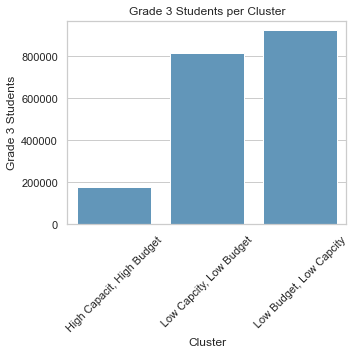

In [114]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['High Capacit, High Budget','Low Capcity, Low Budget', 'Low Budget, Low Capcity'], y=[176109, 813835, 921539], ci = None, color='#5499c7')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Grade 3 Students per Cluster')
ax1.set(xlabel='Cluster', ylabel='Grade 3 Students')        
plt.show()

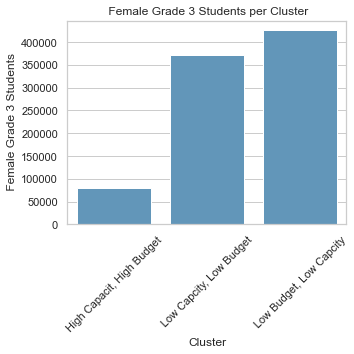

In [116]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['High Capacit, High Budget','Low Capcity, Low Budget', 'Low Budget, Low Capcity'], y=[79003, 372078, 425591], ci = None, color='#5499c7')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title(' Female Grade 3 Students per Cluster')
ax1.set(xlabel='Cluster', ylabel=' Female Grade 3 Students')        
plt.show()

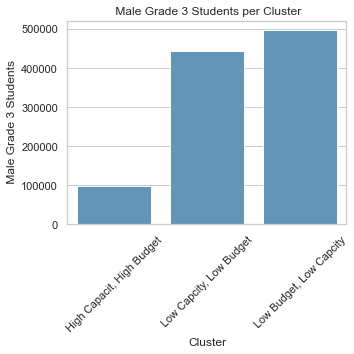

In [117]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['High Capacit, High Budget','Low Capcity, Low Budget', 'Low Budget, Low Capcity'], y=[97106, 441757, 495948], ci = None, color='#5499c7')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title(' Male Grade 3 Students per Cluster')
ax1.set(xlabel='Cluster', ylabel=' Male Grade 3 Students')        
plt.show()

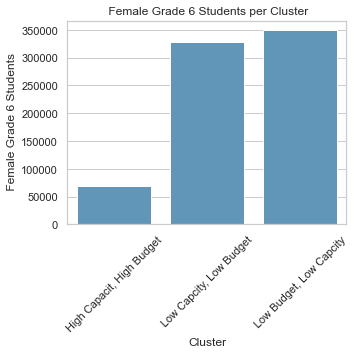

In [118]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['High Capacit, High Budget','Low Capcity, Low Budget', 'Low Budget, Low Capcity'], y=[69886, 327670, 349323], ci = None, color='#5499c7')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title(' Female Grade 6 Students per Cluster')
ax1.set(xlabel='Cluster', ylabel=' Female Grade 6 Students')        
plt.show()

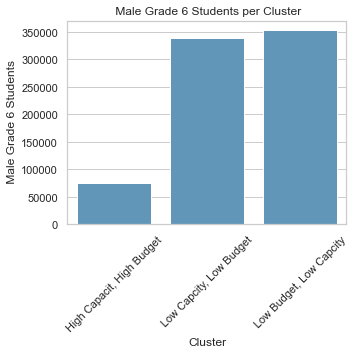

In [119]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['High Capacit, High Budget','Low Capcity, Low Budget', 'Low Budget, Low Capcity'], y=[75165, 338928, 353271], ci = None, color='#5499c7')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title(' Male Grade 6 Students per Cluster')
ax1.set(xlabel='Cluster', ylabel=' Male Grade 6 Students')        
plt.show()

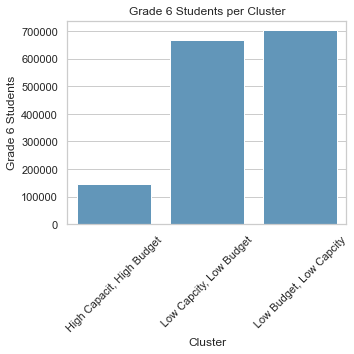

In [115]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['High Capacit, High Budget','Low Capcity, Low Budget', 'Low Budget, Low Capcity'], y=[145051, 666598, 702594], ci = None, color='#5499c7')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Grade 6 Students per Cluster')
ax1.set(xlabel='Cluster', ylabel='Grade 6 Students')        
plt.show()

In [ ]:
plt.scatter(final_scaled[:, 0], final_scaled[:, 1], c=cluster_labels, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
plt.scatter(final_data['Cluster_Labels'],final_data['rooms_ratio'])
plt.xlabel('Cluster Label')
plt.ylabel('Rooms Ratio / Students per Room')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Cluster_Labels', y='rooms_ratio', data=final_data_numeric_2, showfliers=False)
plt.title("Rooms per student by Cluster", fontsize=20)
plt.xlabel("Cluster Number", fontsize=15)
plt.ylabel("Students per Teacher", fontsize=15, rotation=0)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ylabel('Cluster No.')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Cluster_Labels', y='student_ratio', data=final_data_numeric_2, showfliers=False)
plt.title("Students per Teacher by Cluster", fontsize=20)
plt.xlabel("Cluster Number", fontsize=15)
plt.ylabel("Students per Teacher", fontsize=15, rotation=0)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

plt.show()

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Cluster_Labels', y='mooe_per_student', data=final_data_numeric_2, showfliers=False)
plt.title("MOOE per student by Cluster", fontsize=20)
plt.xlabel("Cluster Number", fontsize=15)
plt.ylabel("MOOE per student", fontsize=15, rotation=0)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

plt.show()

In [ ]:
plt.scatter(final_data_numeric_2['Cluster_Labels'],final_data_numeric_2['rooms_ratio'])
plt.xlabel('Cluster Label')
plt.ylabel('Rooms Ratio / Students per Room')
plt.show()

In [ ]:
plt.scatter(final_data_numeric_2['Cluster_Labels'],final_data_numeric_2['mooe_per_student'])
plt.xlabel('Cluster Label')
plt.ylabel('MOOE per student')
plt.show()

In [ ]:
final_data_numeric_2.shape

In [ ]:
final_data_clean.columns

In [ ]:
final_insert_back = final_data_clean[['school.region', 'school.region.name', 'school.province',
       'school.curricularclass', 'school.urban', 'school.name',
       'school.enrollment', 'school.offering', 'rooms_total', 'teachers_total',
    'school.mooe']]

In [ ]:
finale = pd.merge(final_data_numeric_2, final_insert_back, how='left', left_index=True, right_index=True)

In [ ]:
finale2 = pd.merge(finale, final_data['school.cityincome'], how='left', left_index=True, right_index=True)

In [ ]:
finale2.shape

In [ ]:
finale2[finale2['Cluster_Labels']==0]

In [ ]:
finale2[finale2['Cluster_Labels']==1]

In [ ]:
finale2[finale2['Cluster_Labels']==2]

In [ ]:
finale2[finale2['Cluster_Labels']==0]['school.region.name'].value_counts()

In [ ]:
finale2[finale2['Cluster_Labels']==1]['school.region.name'].value_counts()

In [ ]:
finale2[finale2['Cluster_Labels']==2]['school.region.name'].value_counts()

In [ ]:
finale2[finale2['Cluster_Labels']==0]['school.cityincome'].value_counts()

In [ ]:
finale2[finale2['Cluster_Labels']==1]['school.cityincome'].value_counts()

In [ ]:
finale2[finale2['Cluster_Labels']==2]['school.cityincome'].value_counts()

In [ ]:
plt.scatter(final_scaled[:, 0], final_scaled[:, 1], c=cluster_labels, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(final_scaled)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.DataFrame(final_data_numeric_2['Cluster_Labels'], columns=['Cluster_Labels'])], axis = 1)

finalDf

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(final_scaled)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, pd.DataFrame(final_data_numeric_2['Cluster_Labels'], columns=['Cluster_Labels'])], axis = 1)

finalDf

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(finalDf.iloc[:, 0], finalDf.iloc[:, 1],
            c=final_data_numeric_2)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
final_data_numeric_2.dtypes

In [ ]:
#look for relationship with sped (salpak sped)
#mobile rooms, sum sped, mobile, which type of teacher is dominant per cluster, sped per cluster, rooms_data
#enrollment

In [ ]:
#rural schools vs #urban schools
#boys vs girls